# Hands-on Exercise for CLUS Module


### 0. Setting up necessary packages and creating data 

In [2]:
!pip install --user scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in c:\users\15138\anaconda3\lib\site-packages (0.21.3)


Import necessary packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn import datasets

# importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_samples



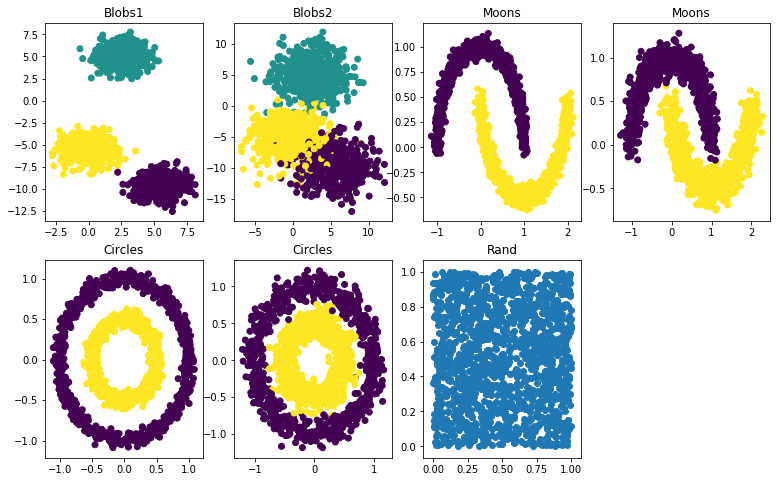

In [4]:
n_samples = 1500
random_state = 10

Blobs1_X, Blobs1_y = datasets.make_blobs(n_samples=n_samples,
                             random_state=random_state)
Blobs2_X, Blobs2_y = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[2.5, 2.5, 2.5],
                             random_state=random_state)
Moons1_X, Moons1_y = datasets.make_moons(n_samples=n_samples, noise=0.05,
                             random_state=random_state)
Moons2_X, Moons2_y = datasets.make_moons(n_samples=n_samples, noise=0.1,
                             random_state=random_state)
Circles1_X, Circles1_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05, random_state=random_state)
Circles2_X, Circles2_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=0.1, random_state=random_state)
Rand_X = np.random.rand(n_samples, 2);
plt.figure(figsize=(13,8))

plt.subplot(2,4,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c= Blobs1_y)
plt.title('Blobs1')

plt.subplot(2,4,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c= Blobs2_y)
plt.title('Blobs2')

plt.subplot(2,4,3)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c= Moons1_y)
plt.title('Moons')

plt.subplot(2,4,4)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c= Moons2_y)
plt.title('Moons')

plt.subplot(2,4,5)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c= Circles1_y)
plt.title('Circles')

plt.subplot(2,4,6)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c= Circles2_y)
plt.title('Circles')

plt.subplot(2,4,7)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand')
plt.show()

Code for RandIndex function

In [5]:
from scipy.special import comb
def rand_index(S, T):

    Spairs = comb(np.bincount(S), 2).sum()
    Tpairs = comb(np.bincount(T), 2).sum()
    
    A = np.c_[(S, T)]
    
    f_11 = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(S))
    
    f_10 = Spairs - f_11
    f_01 = Tpairs - f_11
    f_00 = comb(len(A), 2) - f_11 - f_10 - f_01
    return (f_00 + f_11) / (f_00 + f_01 + f_10 + f_11)

Code for Hopkins statistic

In [6]:
from sklearn.neighbors import NearestNeighbors 
from random import sample 
from numpy.random import uniform 
from math import isnan
def hopkins(X):
    n=X.shape[0]#rows
    d=X.shape[1]#cols
    p=int(0.1*n)#considering 10% of points
    nbrs=NearestNeighbors(n_neighbors=1).fit(X)
    
    rand_X=sample(range(0,n),p)
    uj=[]
    wj=[]
    for j in range(0,p):
        u_dist,_=nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1),2,return_distance=True)
        uj.append(u_dist[0][1])#distances to nearest neighbors in random data
        w_dist,_=nbrs.kneighbors(X[rand_X[j]].reshape(1,-1),2,return_distance=True)
        wj.append(w_dist[0][1])#distances to nearest neighbors in real data
    H=sum(uj)/(sum(uj)+sum(wj))
    if isnan(H):
        print(uj,wj)
        H=0
        
    return H

Code for Silhouette coefficient

In [7]:
def silhouette(X,labels):
    n_clusters=np.size(np.unique(labels));
    sample_silhouette_values=silhouette_samples(X,labels)
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_clusters)
        plt.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)# Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05,y_lower+0.5*size_cluster_i,str(i))#Compute the new y_lower for next cluster
        y_lower=y_upper+10# 10 for the 0 samples
    plt.title("Silhouette plot for the various clusters.")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

### 1. K-Means clustering

<span style="color:red">**Question 1a:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Blob 1 and blob 2. K-means actually finds a globular structure. Since Blob1 and blob2 have the globular data it is easy for k-means to find the clusters.

<span style="color:red">**Question 1b:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> in Moons 1, Moons 2, circles 1 and circles 2, k- means is not expected to do well. As k-means is good for globular data and it also tries to find circular the data for the above mentioned data sets are not globular is shape.


<span style="color:red">**Question 1c:** </span> Run K-Means algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of K-means performance. Describe your rationale for your ranking.

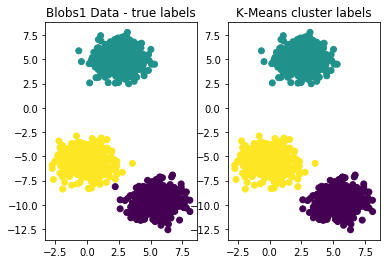

In [44]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred = kmeans.fit_predict(Blobs1_X)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y) # true clusters
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred) # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()


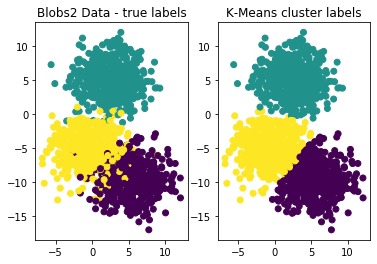

In [16]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred = kmeans.fit_predict(Blobs2_X)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y) # true clusters
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred) # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()


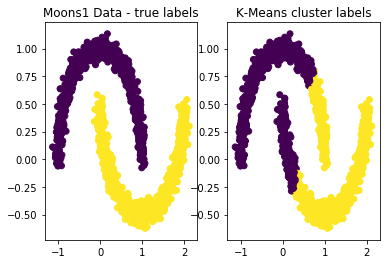

In [13]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred = kmeans.fit_predict(Moons1_X)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y) # true clusters
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y_pred) # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()


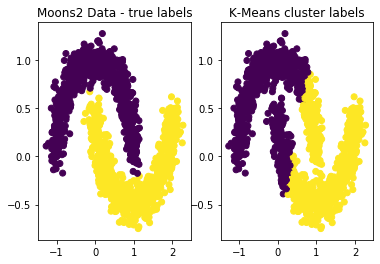

In [15]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred = kmeans.fit_predict(Moons2_X)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y) # true clusters
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y_pred) # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

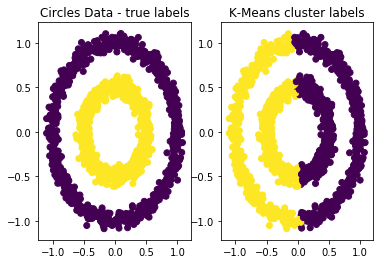

In [16]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred = kmeans.fit_predict(Circles1_X)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Moons2_y) # true clusters
plt.title('Circles Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y_pred) # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

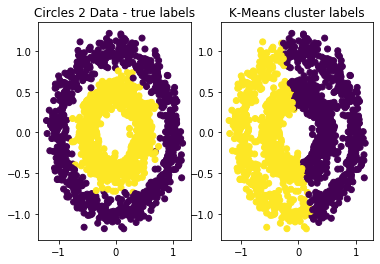

In [17]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred = kmeans.fit_predict(Circles2_X)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Moons2_y) # true clusters
plt.title('Circles 2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y_pred) # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

<span style="color:green">**Answer:** </span>Blobs 1> blobs 2> Moons 2> moons 1 > circles 1 > circles 2 . the highest rand will be the blobs because we are able to find all the clusters . Then Moons have a curved shape which gives a slightly more accuracy than circles as almost 2/3rd of the data is correct classified. and last ranked will be circles as it correctly custering only half of the data.



<span style="color:red">**Question 1d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using K-means. Rank the datasets in decreasing order of Rand-Index scores.

In [20]:
n_clusters = [3,3,2,2,2,2]
DXS=[Blobs1_X,Blobs2_X,Moons1_X,Moons2_X,Circles1_X,Circles2_X]
DYS=[Blobs1_y,Blobs2_y,Moons1_y,Moons2_y,Circles1_y,Circles2_y]
labels=['Blobs1','Blobs2','Moons1','Moons2','Circles1','circles2']

fig = plt.figure(figsize=(8,25))
count = 0;

for n_cluster,label, DX, DY in zip(n_clusters, labels, DXS, DYS):
    kmeans = KMeans(n_clusters=n_cluster, random_state=random_state);
    y_pred = kmeans.fit_predict(DX)
    
    print("for "+label+" : %.4f" % rand_index(y_pred, DY))
    print()

for Blobs1 : 0.9991

for Blobs2 : 0.9207

for Moons1 : 0.6201

for Moons2 : 0.6241

for Circles1 : 0.4997

for circles2 : 0.4997



<Figure size 576x1800 with 0 Axes>

<span style="color:green">**Answer:** </span> Blobs 1> blobs 2> Moons 2> moons 1 > circles 1 = circles 2. 



<span style="color:red">**Question 1e:** </span> Are the rankings in (c) consistent with your observations in (d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span> Yes, my rankings were consistent.



### 2. Agglomerative Clustering - Single Link

<span style="color:red">**Question 2a:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Single link clustering works well when the data containing the clusters are seperated very well or it atleast it should not have any overlap of labels between the clusters. Also single link clustering is susceptible to noice. There shouldnt be any noice data.

Therefore single link clustering works well on blobs1, moons 1 and circles 1.


<span style="color:red">**Question 2b:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Single link clustering doest not perform well when the data contains noise and when the clusters are close enough so that they overlap,

Therefore Single link vlustering might not perform well in blobs 2, moons 2, circles 2.



<span style="color:red">**Question 2c:** </span> Run Single-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Single-link agglomerative algorithm performance. Describe your rationale for your ranking.

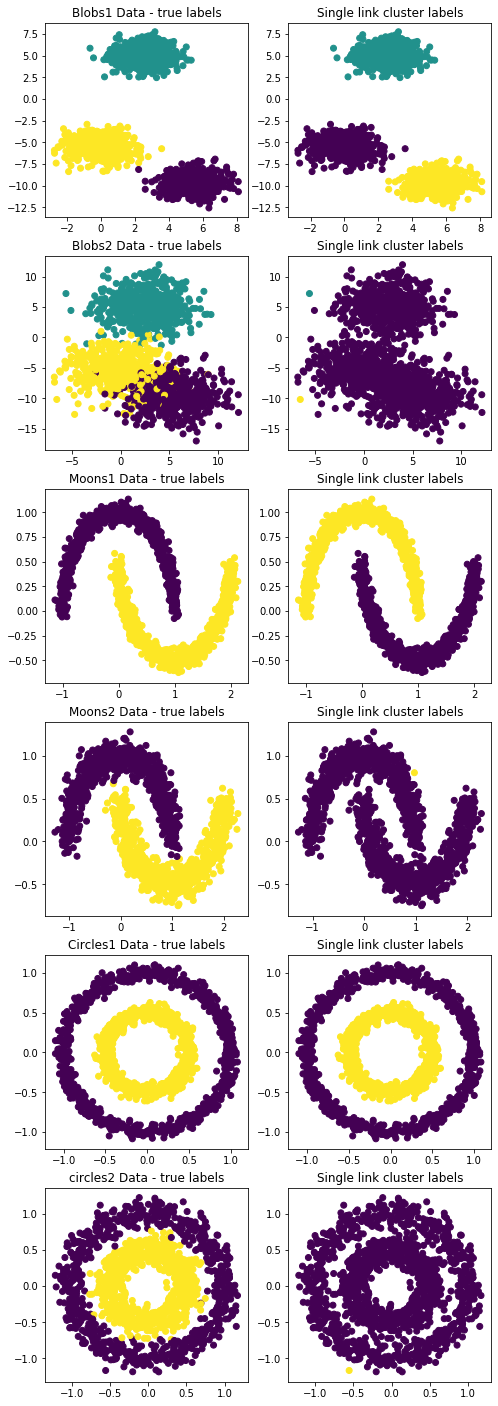

In [25]:
n_clusters = [3,3,2,2,2,2]
DXS=[Blobs1_X,Blobs2_X,Moons1_X,Moons2_X,Circles1_X,Circles2_X]
DYS=[Blobs1_y,Blobs2_y,Moons1_y,Moons2_y,Circles1_y,Circles2_y]
labels=['Blobs1','Blobs2','Moons1','Moons2','Circles1','circles2']

fig = plt.figure(figsize=(8,25))
count = 0;

for n_cluster,label, DX, DY in zip(n_clusters, labels, DXS, DYS):
    count=count+1;
    plt.subplot(6,2,count)
    plt.scatter(DX[:, 0], DX[:, 1], c=DY)
    plt.title(label+' Data - true labels')
    count=count+1;
    plt.subplot(6,2,count)
    single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_cluster)
    y_pred = single_linkage.fit_predict(DX)
    
    plt.scatter(DX[:, 0], DX[:, 1], c=y_pred)
    plt.title('Single link cluster labels')

plt.show()

<span style="color:green">**Answer:** </span>circles 1 =moons 1= bloobs 1> moons 2= circles2> blobs 2
For blobs 2, moons 2 and circles 22 since there is noice in the data, it is taking noice points to one cluster and remaining data as another cluster. Since almost all the data points are labeled as 1 cluster in blobs 2 and also it 3 cluster , it will have the least rank followed by increasing rank of moons 2 and circles2.



<span style="color:red">**Question 2d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Single-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [21]:
n_clusters = [3,3,2,2,2,2]
DXS=[Blobs1_X,Blobs2_X,Moons1_X,Moons2_X,Circles1_X,Circles2_X]
DYS=[Blobs1_y,Blobs2_y,Moons1_y,Moons2_y,Circles1_y,Circles2_y]
labels=['Blobs1','Blobs2','Moons1','Moons2','Circles1','circles2']

fig = plt.figure(figsize=(8,25))
count = 0;

for n_cluster,label, DX, DY in zip(n_clusters, labels, DXS, DYS):
    single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_cluster)
    y_pred = single_linkage.fit_predict(DX)
    
    print("for "+label+" : %.4f" % rand_index(y_pred, DY))
    print()

for Blobs1 : 0.9991

for Blobs2 : 0.3338

for Moons1 : 1.0000

for Moons2 : 0.4997

for Circles1 : 1.0000

for circles2 : 0.4997



<Figure size 576x1800 with 0 Axes>

<span style="color:green">**Answer:** </span> Moons1=Circles1>blobs1>moons2=circles2>blobs2

<span style="color:red">**Question 2e:** </span> Are the rankings in 2(c) consistent with your observations in 2(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span> ranks in 2c and 2d are almost consistent except for blobs 1 because there is purple labeled data near yellow cluster , for which the single link cluster marked it yellow.



### 3. Agglomerative Clustering - Max Link

<span style="color:red">**Question 3a:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Max links performs well when the data contains clusters are not curved and have an alteranating structure. The data should also not contain any noice. 

Therefore max link will perform well in only blobs 1 and in blobs 2 it  will perfome better than single link clustering.


<span style="color:red">**Question 3b:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Max links does not performs well when the data containing clusters are curved and have an alteranating structure. they also do not work well when there is noice in the data.

because of the curve and alternating nature of the data small cluster of one class label tends to merge with other a cluster with other class label. Since we are taking the maximum distance between the cluster there is a chance that the distance between clusters of same class label may be far when compared to other clusters of other class labels.

therefore max link clustering will not perform well in <b> moons 1, moons 2, circles1 and circles 2.</b> 


<span style="color:red">**Question 3c:** </span> Run Max-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Max-link agglomerative algorithm performance. Describe your rationale for your ranking.

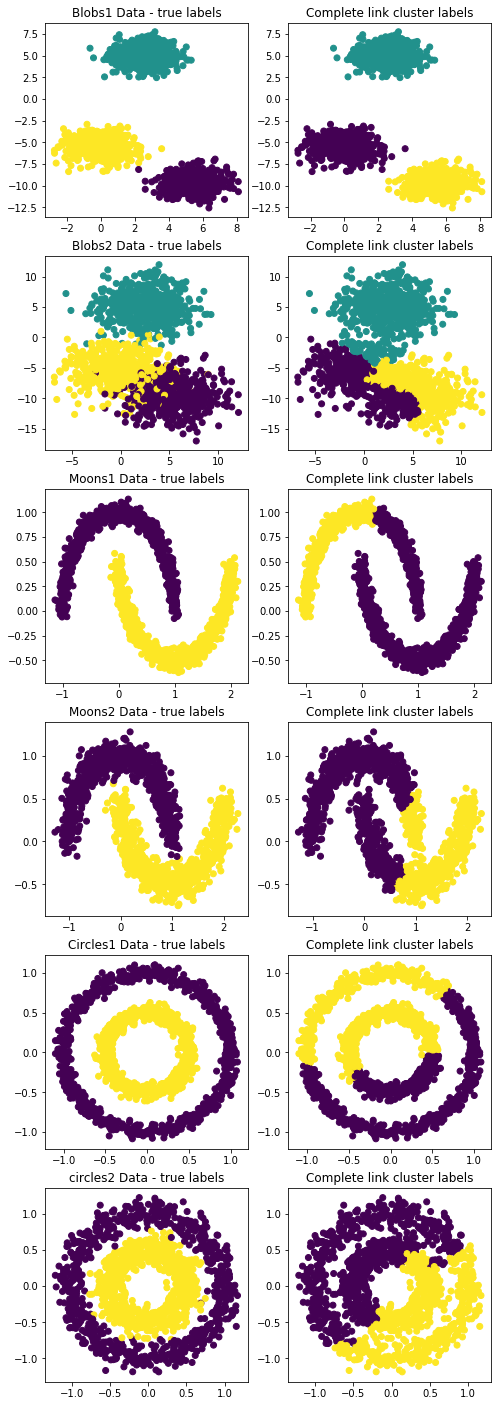

In [7]:
n_clusters = [3,3,2,2,2,2]
DXS=[Blobs1_X,Blobs2_X,Moons1_X,Moons2_X,Circles1_X,Circles2_X]
DYS=[Blobs1_y,Blobs2_y,Moons1_y,Moons2_y,Circles1_y,Circles2_y]
labels=['Blobs1','Blobs2','Moons1','Moons2','Circles1','circles2']

fig = plt.figure(figsize=(8,25))
count = 0;

for n_cluster,label, DX, DY in zip(n_clusters, labels, DXS, DYS):
    count=count+1;
    plt.subplot(6,2,count)
    plt.scatter(DX[:, 0], DX[:, 1], c=DY)
    plt.title(label+' Data - true labels')
    count=count+1;
    plt.subplot(6,2,count)
    complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_cluster)
    y_pred = complete_linkage.fit_predict(DX)
    
    plt.scatter(DX[:, 0], DX[:, 1], c=y_pred)
    plt.title('Complete link cluster labels')

plt.show()

<span style="color:green">**Answer:** </span> blobs 1> blobs 2> moons 1 > moons 2 > circles 1> circles 2

complete link clearly seperates blobs 1 into 3 different clusters so it gets the highest rank.Then blobs 2. Followed by moons 1 because it has clusterd 1 class label perfectly and other class label partially. Then circles as they are almost 50% rightly clusterd.




<span style="color:red">**Question 3d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Max-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [24]:
n_clusters = [3,3,2,2,2,2]
DXS=[Blobs1_X,Blobs2_X,Moons1_X,Moons2_X,Circles1_X,Circles2_X]
DYS=[Blobs1_y,Blobs2_y,Moons1_y,Moons2_y,Circles1_y,Circles2_y]
labels=['Blobs1','Blobs2','Moons1','Moons2','Circles1','circles2']

fig = plt.figure(figsize=(8,25))
count = 0;

for n_cluster,label, DX, DY in zip(n_clusters, labels, DXS, DYS):
    complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_cluster)
    y_pred = complete_linkage.fit_predict(DX)
    
    print("for "+label+" : %.4f" % rand_index(y_pred, DY))
    print()

for Blobs1 : 0.9991

for Blobs2 : 0.7737

for Moons1 : 0.6626

for Moons2 : 0.5965

for Circles1 : 0.5219

for circles2 : 0.5001



<Figure size 576x1800 with 0 Axes>

<span style="color:green">**Answer:** </span> blobs1>blobs 2> moons1> moons2> circles 1> circles 2



<span style="color:red">**Question 3e:** </span> Are the rankings in 3(c) consistent with your observations in 3(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>
Yes my rankings were consistent.


### 4. Agglomerative Clustering - Average Link

<span style="color:red">**Question 4a:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
Average links does not performs well when the data containing clusters are curved and have an alteranating structure. But they do a well when there is also noice in the data.

because of the curve and alternating nature of the data small cluster of one class label tends to merge with other cluster of other class label. Since we are taking the average distance between the cluster there is a chance that the distance between clusters of same class label may be far when compared to other clusters of other class labels.

therefore average link clustering will perform well in <b> blobs 1</b>`



<span style="color:red">**Question 4b:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Average link does not perform well in all the data sets except blobs 1.

As blobs 2 still have noice data points which are very far, Average link clustering will be still susceptible to the noice. So it may not perform well for average clustering. Since the moons data set are curve and alternating, average clustering will not perform well here also. Same as with circles also.



<span style="color:red">**Question 4c:** </span> Run Average-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Average-link agglomerative algorithm performance. Describe your rationale for your ranking.

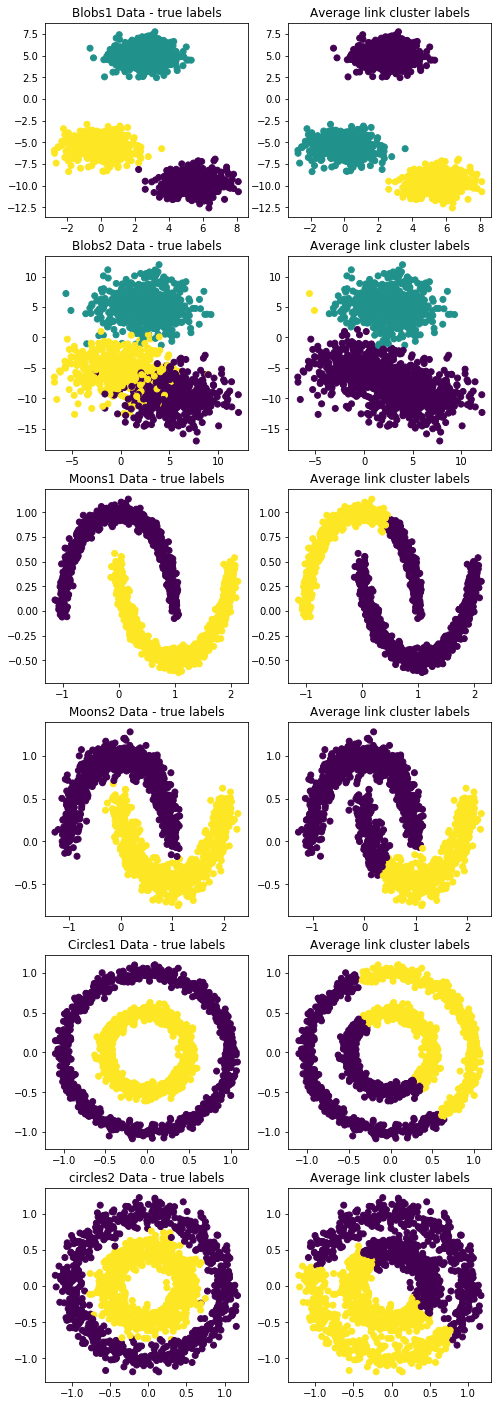

In [13]:
n_clusters = [3,3,2,2,2,2]
DXS=[Blobs1_X,Blobs2_X,Moons1_X,Moons2_X,Circles1_X,Circles2_X]
DYS=[Blobs1_y,Blobs2_y,Moons1_y,Moons2_y,Circles1_y,Circles2_y]
labels=['Blobs1','Blobs2','Moons1','Moons2','Circles1','circles2']

fig = plt.figure(figsize=(8,25))
count = 0;

for n_cluster,label, DX, DY in zip(n_clusters, labels, DXS, DYS):
    count=count+1;
    plt.subplot(6,2,count)
    plt.scatter(DX[:, 0], DX[:, 1], c=DY)
    plt.title(label+' Data - true labels')
    count=count+1;
    plt.subplot(6,2,count)
    linkage = AgglomerativeClustering(linkage="average", n_clusters=n_cluster)
    y_pred = linkage.fit_predict(DX)
    
    plt.scatter(DX[:, 0], DX[:, 1], c=y_pred)
    plt.title('Average link cluster labels')

plt.show()

<span style="color:green">**Answer:** </span> blobs 1>blobs2> moons2 > moons 1> circles1 = circles 2

Clearly blobs1 data has been divided into 3 clusters. therefore it will have the highest rank. followed by blobs 2 because it is atleast clustering to class labels correctly. Followed by moons 2 and moons 1 where the atleast one class label is perfectly clusterd and last ranks will be circles.


<span style="color:red">**Question 4d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Average-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [25]:
n_clusters = [3,3,2,2,2,2]
DXS=[Blobs1_X,Blobs2_X,Moons1_X,Moons2_X,Circles1_X,Circles2_X]
DYS=[Blobs1_y,Blobs2_y,Moons1_y,Moons2_y,Circles1_y,Circles2_y]
labels=['Blobs1','Blobs2','Moons1','Moons2','Circles1','circles2']

fig = plt.figure(figsize=(8,25))
count = 0;

for n_cluster,label, DX, DY in zip(n_clusters, labels, DXS, DYS):
    average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_cluster)
    y_pred = average_linkage.fit_predict(DX)
    
    print("for "+label+" : %.4f" % rand_index(y_pred, DY))
    print()

for Blobs1 : 0.9991

for Blobs2 : 0.7637

for Moons1 : 0.7132

for Moons2 : 0.7458

for Circles1 : 0.5004

for circles2 : 0.5051



<Figure size 576x1800 with 0 Axes>

<span style="color:green">**Answer:** </span>
blobs 1>blobs2> moons2 > moons 1> circles2 > circles1


<span style="color:red">**Question 4e:** </span> Are the rankings in 4(c) consistent with your observations in 4(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span> except for circles data set all other rankings are correct. Where circles 2 is making more clustering of class labels when compared to circles 1. Since the circles are more spread, average link clustering is doing a better job in circles 2 by clustering just more than half data for each label.



### 5. Density Based Clustering: DBSCAN

<span style="color:red">**Question 5a:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Db scan performs well on all the data except blobs2 i.e (blobs1, moons1, moons2, circles1, circles2). Since it depends on the eps and min sup that we take , so according to these values they tend seperate the noice data. Since there is a spread of data in moons 2 and circles 2 , the points which are far away will be the noice data.



<span style="color:red">**Question 5b:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> DB scan does not perform well on Blobs 2 because the two clusters overap each other and when take an eps with an minsup, a circle with radius eps will have other cluster labels which satisfy the minsup. therefore blobs2 we might get 2 clusters.



<span style="color:red">**Question 5c:** </span> Run DBSCAN clustering algorithm on all the datasets (except Rand). __Choose eps and min_samples parameters to make sure that DBSCAN finds the same number of clusters as in the ground truth ('Data_y').__ Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of DBSCAN clustering algorithm performance. Describe your rationale for your ranking.

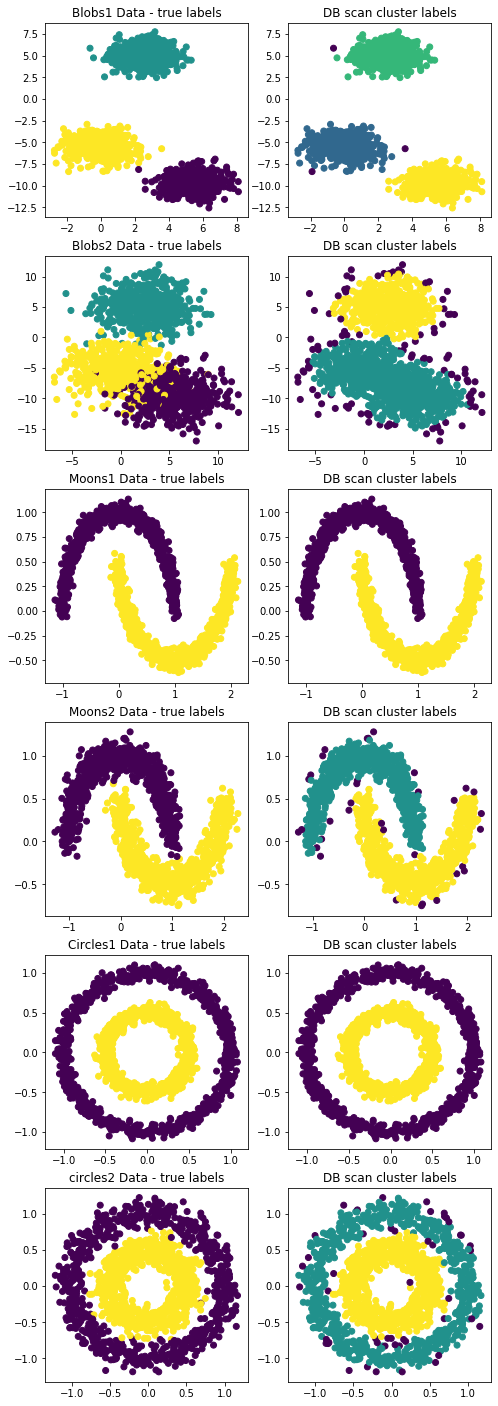

In [22]:
n_clusters = [3,3,2,2,2,2]
DXS=[Blobs1_X,Blobs2_X,Moons1_X,Moons2_X,Circles1_X,Circles2_X]
DYS=[Blobs1_y,Blobs2_y,Moons1_y,Moons2_y,Circles1_y,Circles2_y]
labels=['Blobs1','Blobs2','Moons1','Moons2','Circles1','circles2']
eps=[1,1.5,0.2,0.1,0.2,0.1]
min_samples=[10,27,10,8,10,8]

fig = plt.figure(figsize=(8,25))
count = 0;

for n_cluster,label, DX, DY,min_sample,ep in zip(n_clusters, labels, DXS, DYS, min_samples, eps):
    count=count+1;
    plt.subplot(6,2,count)
    plt.scatter(DX[:, 0], DX[:, 1], c=DY)
    plt.title(label+' Data - true labels')
    count=count+1;
    plt.subplot(6,2,count)
    dbscan = DBSCAN(eps=ep, min_samples=min_sample)
    
    y_pred = dbscan.fit_predict(DX)
    
    plt.scatter(DX[:, 0], DX[:, 1], c=y_pred)
    plt.title('DB scan cluster labels')

plt.show()

<span style="color:green">**Answer:** </span> Moons 1= Circles 1> blobs 1> moons 2 > circles 2> blobs 2

Moons 1and circles1 are clearly has the highest rank as the there is very less noice data in the figure and all the 3 class labels are correctly clustered. But moons 2, circles2 and blobs 1 have few noice points which actually reduces their though the class labels are correctly clustered. Least rank will be for the blobs 2 since the Dbscan could cluster the data. Every core point is with in the other core point therefore it is considering the below 2 clusters as a single cluster.


<span style="color:red">**Question 5d:** </span> For each of the datasets, how many noise points did the DBSCAN algorithm find? Which three datasets had the least number of noise points? Explain the reason(s) why these datasets had least noise points?

In [24]:
n_clusters = [3,3,2,2,2,2]
DXS=[Blobs1_X,Blobs2_X,Moons1_X,Moons2_X,Circles1_X,Circles2_X]
DYS=[Blobs1_y,Blobs2_y,Moons1_y,Moons2_y,Circles1_y,Circles2_y]
labels=['Blobs1','Blobs2','Moons1','Moons2','Circles1','circles2']
eps=[1,1.5,0.2,0.1,0.2,0.1]
min_samples=[10,27,10,8,10,8]
count=0;

fig = plt.figure(figsize=(8,25))

for n_cluster,label, DX, DY, min_sample, ep in zip(n_clusters, labels, DXS, DYS, min_samples ,eps):
    dbscan = DBSCAN(eps=ep, min_samples=min_sample)
    y_pred = dbscan.fit_predict(DX)
    count=0;
    for n, i in enumerate(y_pred):
        if i == -1:
          count= count+1
    print("for "+label+" : %.4f" % count)
    print()

for Blobs1 : 3.0000

for Blobs2 : 109.0000

for Moons1 : 0.0000

for Moons2 : 34.0000

for Circles1 : 0.0000

for circles2 : 48.0000



<Figure size 576x1800 with 0 Axes>

<span style="color:green">**Answer:** </span> Moons 1 and circles 1 have least amount of noice points, because for a given eps and minsup, for all the core point every point is a neighbour point . There is no point such that it is not in the neighbourhood of the core point.



<span style="color:red">**Question 5e:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using DBSCAN clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [30]:
n_clusters = [3,3,2,2,2,2]
DXS=[Blobs1_X,Blobs2_X,Moons1_X,Moons2_X,Circles1_X,Circles2_X]
DYS=[Blobs1_y,Blobs2_y,Moons1_y,Moons2_y,Circles1_y,Circles2_y]
labels=['Blobs1','Blobs2','Moons1','Moons2','Circles1','circles2']
eps=[1,1.5,0.2,0.1,0.2,0.1]
min_samples=[10,29,10,8,10,8]


fig = plt.figure(figsize=(8,25))

for n_cluster,label, DX, DY, min_sample, ep in zip(n_clusters, labels, DXS, DYS, min_samples ,eps):
    dbscan = DBSCAN(eps=ep, min_samples=min_sample)
    y_pred = dbscan.fit_predict(DX)
    for n, i in enumerate(y_pred):
        if i == -1:
          y_pred[n] = 5
        
    print("for "+label+" : %.4f" % rand_index(y_pred, DY))
    print()

for Blobs1 : 0.9978

for Blobs2 : 0.7492

for Moons1 : 1.0000

for Moons2 : 0.9763

for Circles1 : 1.0000

for circles2 : 0.9591



<Figure size 576x1800 with 0 Axes>

<span style="color:green">**Answer:** </span>
moons1 = circles1> blobs 1 > moons2 > circles 2 > blobs2


<span style="color:red">**Question 5f:** </span> Are the rankings in 5(c) consistent with your observations in 5(e)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span> Yes my rankings are consistent.



### 6. Spectral Clustering

<span style="color:red">**Question 6a:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Spectaral clustering performs well with blobs1 and blob2 because spectral clustering calculates an affinity graph and do the clustering based on the. Since the points closer to each other will have high affinity, points belonging to one cluster are closer to each other in blobs 1 and blobs2.

<span style="color:red">**Question 6b:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Spectral clustering does not perform well on moons 1 & 2 , circles 1&2  because the data points belonging to the 2 cluster are alternate. This leads to situation where affinity between one cluster to other cluster data points is more compared to within cluster data points.



<span style="color:red">**Question 6c:** </span> Run Spectral clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Spectral clustering algorithm performance. Describe your rationale for your ranking.

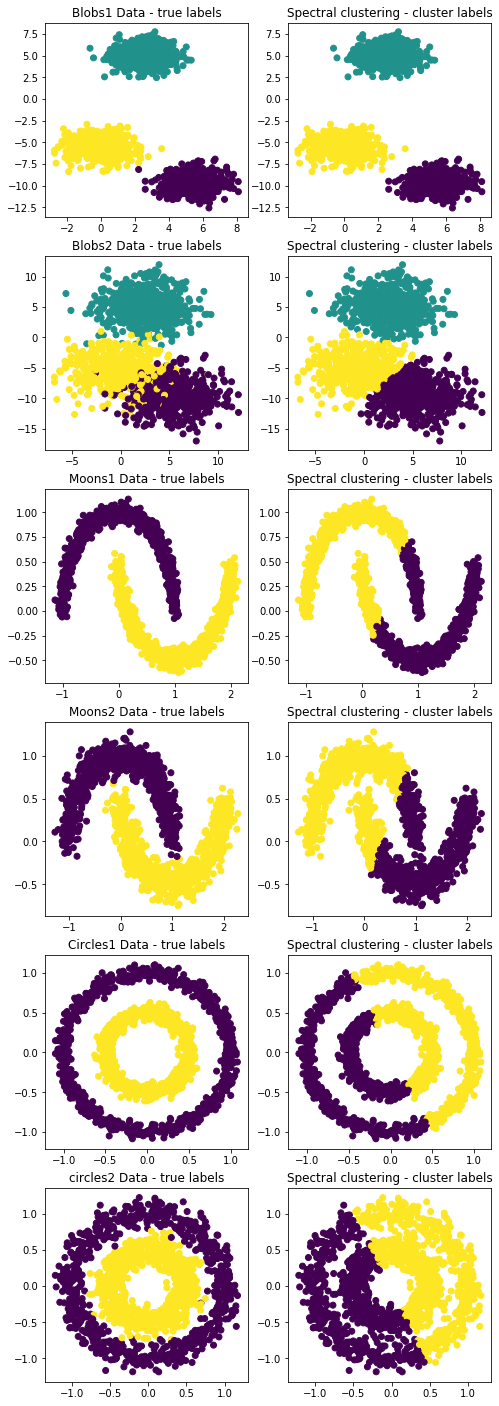

In [29]:
n_clusters = [3,3,2,2,2,2]
DXS=[Blobs1_X,Blobs2_X,Moons1_X,Moons2_X,Circles1_X,Circles2_X]
DYS=[Blobs1_y,Blobs2_y,Moons1_y,Moons2_y,Circles1_y,Circles2_y]
labels=['Blobs1','Blobs2','Moons1','Moons2','Circles1','circles2']

fig = plt.figure(figsize=(8,25))
count = 0;

for n_cluster,label, DX, DY in zip(n_clusters, labels, DXS, DYS):
    count=count+1;
    plt.subplot(6,2,count)
    plt.scatter(DX[:, 0], DX[:, 1], c=DY)
    plt.title(label+' Data - true labels')
    count=count+1;
    plt.subplot(6,2,count)
    spectral = SpectralClustering(n_clusters=n_cluster, random_state=random_state)

    y_pred = spectral.fit_predict(DX)
    
    plt.scatter(DX[:, 0], DX[:, 1], c=y_pred)
    plt.title('Spectral clustering - cluster labels')

plt.show()

<span style="color:green">**Answer:** </span> blobs1 > blob2 > moons 1 ~ moons 2> circles1 ~ circles 2.

We can see clearly that blobs 1 and blobs 2 data have been clustered neatly therefore  they have a higher rank. followed by moons 1 and 2 where 2/3rd of the class labels are correctly clustered. the last ranked are circles where almost 50% of class labels are correctly clustered.


<span style="color:red">**Question 6d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Spectral clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [18]:
n_clusters = [3,3,2,2,2,2]
DXS=[Blobs1_X,Blobs2_X,Moons1_X,Moons2_X,Circles1_X,Circles2_X]
DYS=[Blobs1_y,Blobs2_y,Moons1_y,Moons2_y,Circles1_y,Circles2_y]
labels=['Blobs1','Blobs2','Moons1','Moons2','Circles1','circles2']

fig = plt.figure(figsize=(8,25))
count = 0;

for n_cluster,label, DX, DY in zip(n_clusters, labels, DXS, DYS):
    spectral = SpectralClustering(n_clusters=n_cluster, random_state=random_state)

    y_pred = spectral.fit_predict(DX)
    
    print("for "+label+" : %.4f" % rand_index(y_pred, DY))
    print()

for Blobs1 : 0.9991

for Blobs2 : 0.9192

for Moons1 : 0.6441

for Moons2 : 0.6448

for Circles1 : 0.4997

for circles2 : 0.4998



<Figure size 576x1800 with 0 Axes>

<span style="color:green">**Answer:** </span> blobs 1> blobs 2> moons 2> moons 1> circles 2 > circles 1



<span style="color:red">**Question 6e:** </span> Are the rankings in 6(c) consistent with your observations in 6(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span> yes my rankings were consistent.



### 7. Clustering Tendency

<span style="color:red">**Question 7a:** </span> Without using any metrics, for all the datasets (INCLUDING __Rand__) provided in the practice session, list the datasets that exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> By hopkins statistics, We can say if a data set exibits good clustering. if H=0 it is good clustering and if H=1 then the data is regularly distributed.

we know hopkin statistic is defines as H= wi/(wi+ui). 

where wi= sum (nearest neighbour distances of the sample of points from orginal data set)

ui=sum(nearest neighbour distances of the artificially generated points to orginal data set).

So it all depends on ui, if ui=0 then H=1 and and if ui is large then H=0;
So less the random spread more the data set will be good clustering.

So the data sets that exhibit good clustering are <b>blobs1</b> and <b>moons1</b> because the data for them is not spread randomly. All the cluster points are close together.

<span style="color:red">**Question 7b:** </span> Without using any metrics, for all the datasets (INCLUDING Rand) provided in the practice session, list the datasets that do NOT exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>As mentioned above more the spread in the data less it will exhibit good clustering tendency therefore <b> blobs 2 , moons 2, circles and rand </b> will not exhibit good clustering.


<span style="color:red">**Question 7c:** </span> Compute Hopkins Statistic statistic for all the datasets and rank them based on decreasing order of this metric.

In [32]:
DXS=[Blobs1_X,Blobs2_X,Moons1_X,Moons2_X,Circles1_X,Circles2_X,Rand_X]
labels=['Blobs1','Blobs2','Moons1','Moons2','Circles1','circles2','Rand']

for label, DX in zip(labels, DXS):
    print("for "+label+" : %.4f" % hopkins(DX))
    print()


for Blobs1 : 0.9374

for Blobs2 : 0.8326

for Moons1 : 0.9204

for Moons2 : 0.8627

for Circles1 : 0.8493

for circles2 : 0.8115

for Rand : 0.5881



<span style="color:green">**Answer:** </span> blobs1> moons 1> moons 2> circles1 > blobs 2> circles 2 > rand.





<span style="color:red">**Question 7d:** </span> Are your answers for 7(a) and 7(b) consistent with that of (c)? If not, explain the reason for this inconsistency.

<span style="color:green">**Answer:** </span> Yes my answers were consistent.


<span style="color:red">**Question 7e:** </span> Run all the above clustering algorithms (KMeans, GMM, Agglomerative (single, max, average), DBSCAN, Spectral), using n_clusters = 3, on Rand dataset and visualize the clusters. Explain the reason for the shapes of clusters dervied using each clustering approach.

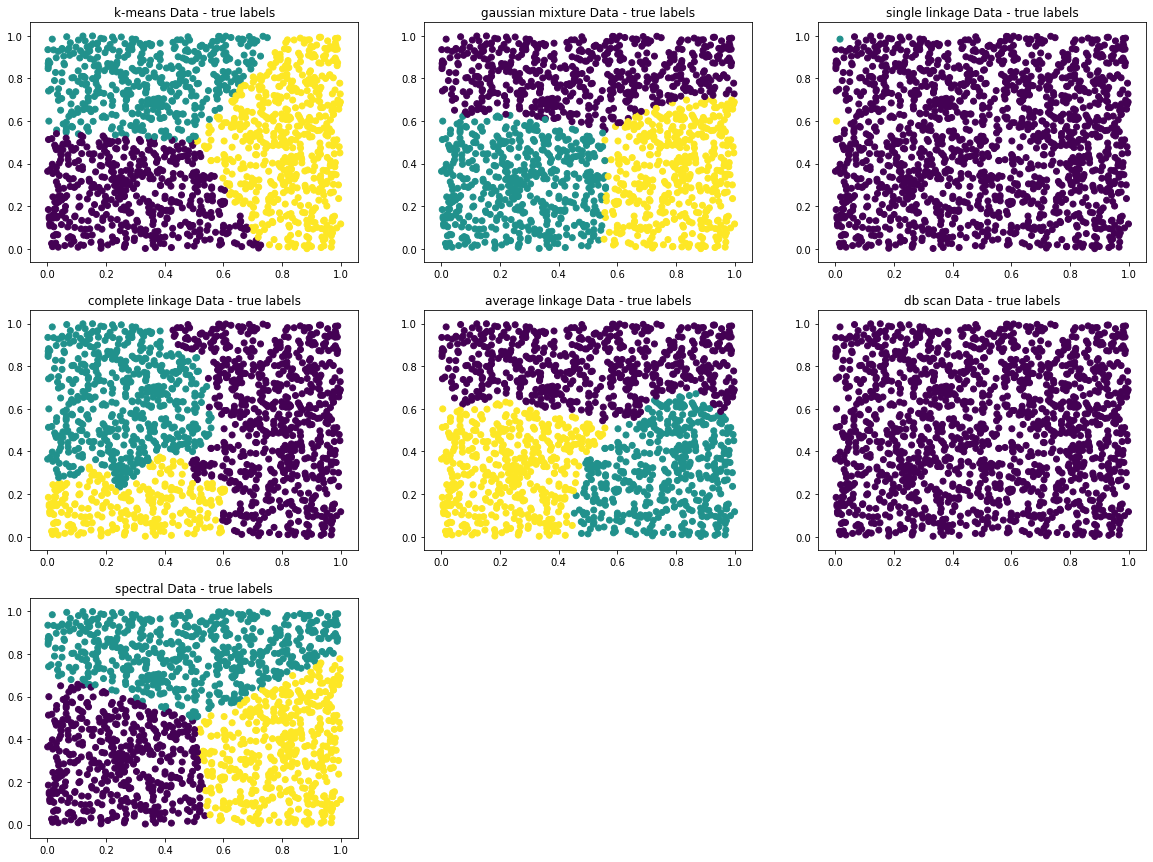

In [24]:
labels=['k-means','gaussian mixture','single linkage','complete linkage','average linkage','db scan','spectral']

kmeans = KMeans(n_clusters=3, random_state=random_state)
km_pred = kmeans.fit_predict(Rand_X)

gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm_pred = gmm.fit_predict(Rand_X)

single_linkage = AgglomerativeClustering(linkage="single", n_clusters=3)
si_pred = single_linkage.fit_predict(Rand_X)

complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=3)
co_pred = complete_linkage.fit_predict(Rand_X)

linkage = AgglomerativeClustering(linkage="average", n_clusters=3)
av_pred = linkage.fit_predict(Rand_X)
    
dbscan = DBSCAN(eps=1, min_samples=10)
db_pred = dbscan.fit_predict(Rand_X)

spectral = SpectralClustering(n_clusters=3, random_state=random_state)
sp_pred = spectral.fit_predict(Rand_X)

y_preds=[km_pred,gmm_pred, si_pred, co_pred, av_pred, db_pred, sp_pred]

fig = plt.figure(figsize=(20,15))
count = 0;

for y_pred,label in zip(y_preds, labels):
    count=count+1;
    plt.subplot(3,3,count)
    plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred)
    plt.title(label+' Data - true labels')
plt.show()

<span style="color:green">**Answer:** </span>
<b>k-means:</b> k-means tries to find a globular shape because it takes few random means and modify the mean based on the nearest distances from that mean which makes it find a globular structure. We may find a new cluster each time because it depends on the initial mean consideration points.

<b> Singular link :</b>Singular link joins each cluster to the nearest data point and modifies the distance between newly modified/merged cluster to other data points with smallest distance between them. Since there are 2 new noice points which are far from every point they alone form the cluster which makes the whole data as single cluster leaving those 2 points.

<b> Complete link: </b>Complete link joins each cluster to the nearest data point and modifies the distance between newly modified/merged cluster to other data points with largest distance between them. This leads to a random shape based on the maxiumum distance between the clusters.

<b> Average link: </b>Average link joins each cluster to the nearest data point and modifies the distance between newly modified/merged cluster to other data points with largest distance between them. This leads to a random shape based on the average distance between the clusters.

<b> DB scan :</b> Db scan does not take any number cluster as inputs. So for a given eps and min points it tries to come with few clusters. So for the given eps and min points it is making every point as a core point and also all the core points are with in the nighbourhood of other core points. So it making only one clustering.

<b> Spectral Clustering:</b> Since spectral clustering is based on the affinity between points. It tries to give random shape to the cluster based on the high affinity within the cluster.

<b>Gaussian Mixture</b> For a data set GMM tries to construct gaussian function over the data. the shape completely random and depends on initial consideration of the mean points.


### 8. Real-world dataset

We will use the same breast cancer dataset we used for Classificatione exercise here.

In [26]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [27]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Class labels are:

In [28]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Create dataset for classification

In [29]:
Cancer_X = cancer.data
Cancer_y = cancer.target

Size of Cancer_X and Cancer_y

In [30]:
Cancer_X.shape

(569, 30)

In [31]:
Cancer_y.shape

(569,)

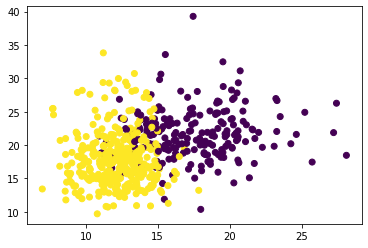

In [32]:
plt.scatter(Cancer_X[:, 0], Cancer_X[:, 1], c= Cancer_y)

<span style="color:red">**Question 8a:** </span> Compute SSE for k = range(2,40), i.e, for k=2,3,4,...,40

In [33]:
score = np.zeros(41);
for i in range(1,41):
    kmeans = KMeans(n_clusters=i, random_state=random_state); #Initializing KMeans
    kmeans.fit_predict(Cancer_X) #Clustering using KMeans
    score[i] = -kmeans.score(Cancer_X) #Computing SSE
    print("SSE for k=",i,":", round(score[i],2)) #Printing SSE

SSE for k= 1 : 256677243.95
SSE for k= 2 : 77943099.88
SSE for k= 3 : 47285926.9
SSE for k= 4 : 29226541.65
SSE for k= 5 : 20539877.62
SSE for k= 6 : 16558716.7
SSE for k= 7 : 13249736.07
SSE for k= 8 : 11183535.78
SSE for k= 9 : 9609383.58
SSE for k= 10 : 8487166.05
SSE for k= 11 : 7613587.21
SSE for k= 12 : 6784588.86
SSE for k= 13 : 6157087.42
SSE for k= 14 : 5708365.13
SSE for k= 15 : 5286031.4
SSE for k= 16 : 4848940.46
SSE for k= 17 : 4398276.58
SSE for k= 18 : 4009831.04
SSE for k= 19 : 3738118.1
SSE for k= 20 : 3578729.29
SSE for k= 21 : 3312041.59
SSE for k= 22 : 3102392.22
SSE for k= 23 : 2894387.69
SSE for k= 24 : 2768624.68
SSE for k= 25 : 2685795.48
SSE for k= 26 : 2514580.5
SSE for k= 27 : 2362959.95
SSE for k= 28 : 2257591.62
SSE for k= 29 : 2148955.49
SSE for k= 30 : 2036764.0
SSE for k= 31 : 1969448.35
SSE for k= 32 : 1833170.63
SSE for k= 33 : 1791369.0
SSE for k= 34 : 1722589.76
SSE for k= 35 : 1677340.13
SSE for k= 36 : 1656114.54
SSE for k= 37 : 1528956.63
SSE for 

<span style="color:red">**Question 8b:** </span> Plot SSE values for k = range(2,40), i.e, for k=2,3,4,...,40

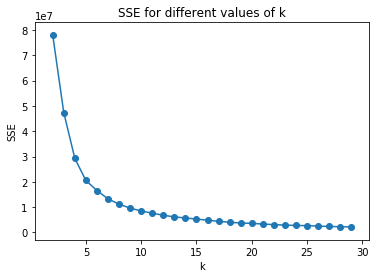

In [34]:
plt.plot(range(2,30),score[2:30])
plt.scatter(range(2,30),score[2:30])
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE for different values of k')
plt.show()

<span style="color:red">**Question 8c:** </span> Using this plot, determine the 'k' that you will use to do K-Means clustering.

<span style="color:green">**Answer:** </span> k will be a value when adding an additional cluster will not affter the SSE. Since here the graph is cruve . After the values from the range 7-10, SSE will not change. Considering k=7 from this range.

<span style="color:red">**Question 8d:** </span> Using the 'k' you chose in (c), compute k-Means clustering.

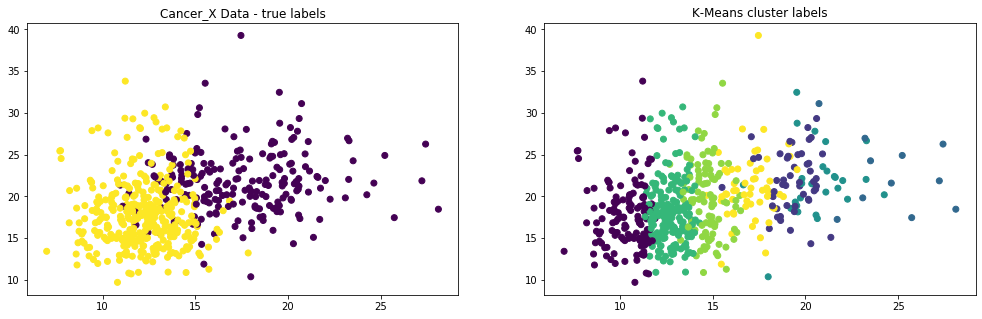

In [35]:
n_clusters =7
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred = kmeans.fit_predict(Cancer_X)
fig = plt.figure(figsize=(17,5))


plt.subplot(1,2,1)
plt.scatter(Cancer_X[:, 0], Cancer_X[:, 1], c=Cancer_y) # true clusters
plt.title('Cancer_X Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Cancer_X[:, 0], Cancer_X[:, 1], c=y_pred) # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

<span style="color:red">**Question 8e:** </span> Plot the silhouette values for points in each cluster (using the silhouette() function provided in the practice notebook). .

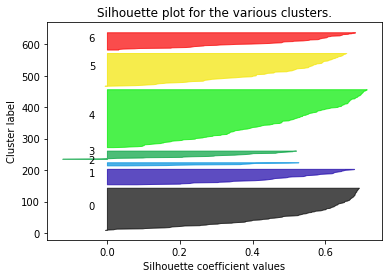

In [36]:
silhouette(Cancer_X,y_pred)

<span style="color:red">**Question 8f:** </span> Comment on the quality of the clusters discovered using k-Means. Which of the clusters would you treat as good clusters and which clusters do you treat as not-so-good clusters?

<span style="color:green">**Answer:** </span> Silhoute value +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

Among the clusters from the figure we can say that most points in cluster 0,1,4,5,6 are better than cluster 2,3.


<span style="color:red">**Question 8g:** </span> Compute the Rand Index of the k-means clusters with respect to the true labels. Comment on the quality of the clustering based on the Rand-Index score.

In [37]:
rand_index(y_pred,Cancer_y )

0.6167231862174807

<span style="color:green">**Answer:** </span> Rand index gives the accuracy of the clusters that have correctly formed. Since rand index= 61% which means the quality of indexing is not so good. 


<span style="color:red">**Question 8h:** </span> To use DBSCAN to find clusters in this data, one needs to determine eps and min_samples. To do this, consider the range of values eps = 50, 100, 150, 200, 250, 300, 400, 500 and min_samples = 10, 15, 20, 25, 30. 

For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of clusters obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of clusters, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

max(y_pred)+1

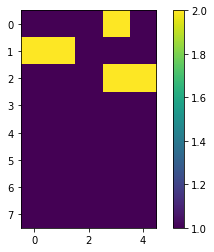

In [62]:
DXS=[Blobs1_X,Blobs2_X,Moons1_X,Moons2_X,Circles1_X,Circles2_X]
DYS=[Blobs1_y,Blobs2_y,Moons1_y,Moons2_y,Circles1_y,Circles2_y]
labels=['Blobs1','Blobs2','Moons1','Moons2','Circles1','circles2']
eps=[50, 100, 150, 200, 250, 300, 400, 500]
min_samples=[10, 15, 20, 25, 30]


count = 0;
i=0;
w, h = 5, 8;
mat = [[0 for x in range(w)] for y in range(h)]

j=0;
fig,ax=plt.subplots()
for min_sample in min_samples:    
    i=0;
    for ep in eps:        
        dbscan = DBSCAN(eps=ep, min_samples=min_sample)
        y_pred = dbscan.fit_predict(Cancer_X)
        mat[i][j]= max(y_pred)+1;
        i=i+1;  
    j=j+1;

im=plt.imshow(mat)
fig.colorbar(im)
plt.show()

In [ ]:
bar to the right shows the number of clusters.

<span style="color:red">**Question 8i:** </span> For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of noise points obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of noise points, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

sum(y_pred==-1)

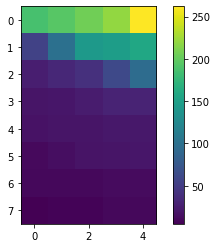

In [63]:
DXS=[Blobs1_X,Blobs2_X,Moons1_X,Moons2_X,Circles1_X,Circles2_X]
DYS=[Blobs1_y,Blobs2_y,Moons1_y,Moons2_y,Circles1_y,Circles2_y]
labels=['Blobs1','Blobs2','Moons1','Moons2','Circles1','circles2']
eps=[50, 100, 150, 200, 250, 300, 400, 500]
min_samples=[10, 15, 20, 25, 30]


count = 0;
i=0;
w, h = 5, 8;
mat = [[0 for x in range(w)] for y in range(h)]

j=0;
fig,ax=plt.subplots()
for min_sample in min_samples:    
    i=0;
    for ep in eps:        
        dbscan = DBSCAN(eps=ep, min_samples=min_sample)
        y_pred = dbscan.fit_predict(Cancer_X)
        mat[i][j]= sum(y_pred==-1);
        i=i+1;  
    j=j+1;

im=plt.imshow(mat)
fig.colorbar(im)
plt.show()

In [ ]:
bar to the right shows the number of noice points

<span style="color:red">**Question 8j:** </span> What observations can you make about the clustering structure in this data, based on the matrices you generated for 8(g) and 8(h)?

<span style="color:green">**Answer:** </span> DB scan is trying to cluster the data based on the eps and min samples. So if we take the eps and minsamples to be too small then it will only find few clusters leaving many points as noice points. But , by taking eps and minsamples to be too huge will lead to single cluster.

So the minsamples and eps values chould be choosed carefully and it should not be too huge or too small.



<span style="color:red">**Question 8k:** </span> Select the parameters for eps, min_samples based on your answers for 8(g), 8(h) and 8(i). Compute cluster assigments using DBSCAN. Compute RandIndex of the cluster assignments with respect to the true labels.

In [67]:
dbscan = DBSCAN(eps=100, min_samples=10)
y_pred = dbscan.fit_predict(Cancer_X)
for n, i in enumerate(y_pred):
        if i == -1:
          y_pred[n] = 5
rand_index(Cancer_y,y_pred)

0.6680115844451595

<span style="color:red">**Question 8l:** </span> Compare RandIndex from 8(g) with that of 8(k) and determine which algorithm performed best? Based on this, comment on how the data/clusters may be distributed in $R^d$.

<span style="color:green">**Answer:** </span>rand index in 8(g) is 0.66 and rand index in 8(k) is 0.61. therefore db scan is better algorithm for this data set when compared to k-means.

Also from SSE we could tell that there 7 or more clusters. But we could get a better accuracy in DB scan for 2 clusters.

the data/ clusters should have been distributed globular in d-dimension with a large spread among the data.
